In [1]:
### for array operations
import numpy as np

### for plotting
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

### for operations on FITS images
from astropy.io import fits

### statistics functions needed in this tutorial
from scipy import stats
from scipy.stats import norm
from math import ceil

In [2]:
#read spec flat image file
flatimage=fits.open('spec_flat_field.FIT')
imagedata_fl=flatimage[0].data
imagedata_fl.shape

(510, 765)

In [3]:
#make the image horizontal by rotating y 
A=np.array(([1,0],[-10/765,1])) #tranformation matrix
rot_data=np.empty(shape=(510,765))
for y in range(510):
    for x in range(765):
        xp,yp=(A@[x,y])
        if xp>0 and yp>0:
            rot_data[ceil(yp)][int(xp)]=imagedata_fl[y][x]

In [7]:
rotated=fits.PrimaryHDU(rot_data)
#rotated.writeto('rotated_spec_flat.FIT')

In [10]:
cut_rotfl=rot_data[75:206,:]
cut=fits.PrimaryHDU(cut_rotfl)
#cut.writeto('cut_rotated_spec_flat.FIT')
cut_rotfl.shape

(131, 765)

In [1]:
#fit averaged counts wrt wl.
%matplotlib inline
avgcounts_fl=np.mean(cut_rotfl,axis=0)
wl=np.array([i for i in range(765)])
plt.figure(figsize=(13,9))
plt.plot(wl[1:765],avgcounts_fl[1:765],'+')
fit=np.poly1d(np.polyfit(wl,avgcounts_fl,3))
plt.plot(wl,fit(wl))
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-c3ccb99fd27e>", line 2, in <module>
    get_ipython().run_line_magic('matplotlib', 'inline')
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2131, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-107>", line 2, in matplotlib
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py", line 99, in matplotlib
    gui, backend = self.shell.enable_matplotlib(args.gui)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3039, in enable_matplotlib
    gui, backend = pt

FileNotFoundError: [Errno 2] No such file or directory

In [13]:
#normalizing flat field
norm_fl=avgcounts_fl/fit(wl)
norm_fl.shape

(765,)

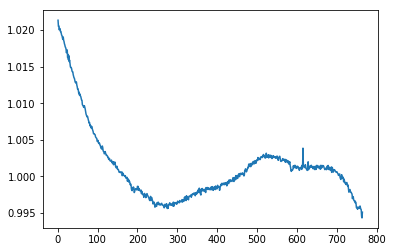

In [14]:
plt.plot(wl[1:765],norm_fl[1:765])